In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()

In [63]:
df = pd.DataFrame(
    iris.data, columns=iris.feature_names
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'sepal width (cm)')

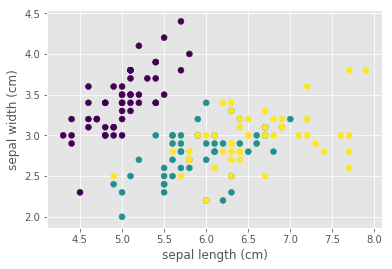

In [64]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

([<matplotlib.axis.XTick at 0x1c2470b128>,
 <a list of 4 Text xticklabel objects>)

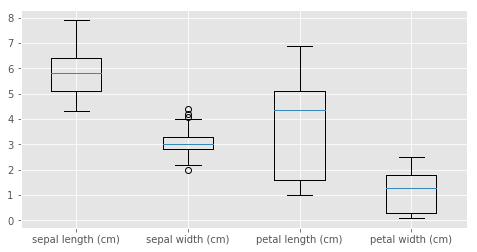

In [65]:
plt.figure(figsize=(8, 4))
plt.boxplot(df.values)
plt.xticks(np.arange(1, df.shape[1]+1), df.columns.tolist())

Text(0, 0.5, 'Frequency')

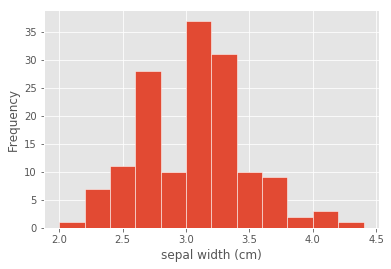

In [66]:
plt.hist(df['sepal width (cm)'], bins=12, edgecolor='w')
plt.xlabel('sepal width (cm)')
plt.ylabel('Frequency')

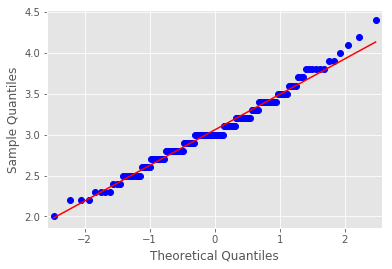

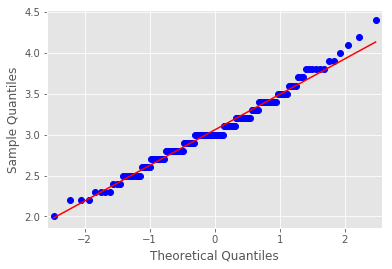

In [69]:
import statsmodels.api as sm

ax = plt.gca()
sm.qqplot(df['sepal width (cm)'], line='s', ax=ax)

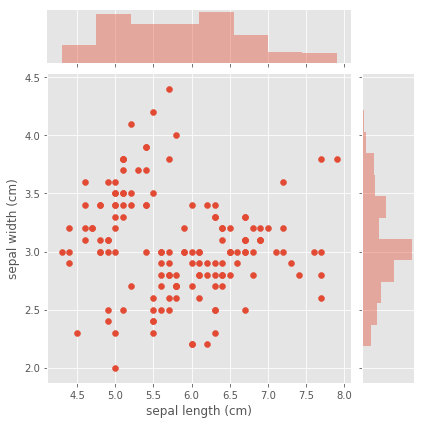

In [70]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df)

### Visualizing the Pattern of Missing Data

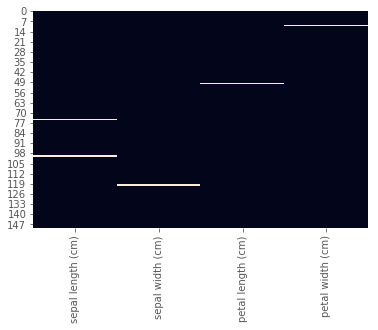

In [71]:
df1 = df.copy()
df1.iloc[10, 3] = None
df1.iloc[50, 2] = None
df1.iloc[120, 1] = None
df1.iloc[75, 0] = None
df1.iloc[100, 0] = None
sns.heatmap(df1.isnull(), cbar=False)

In [72]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


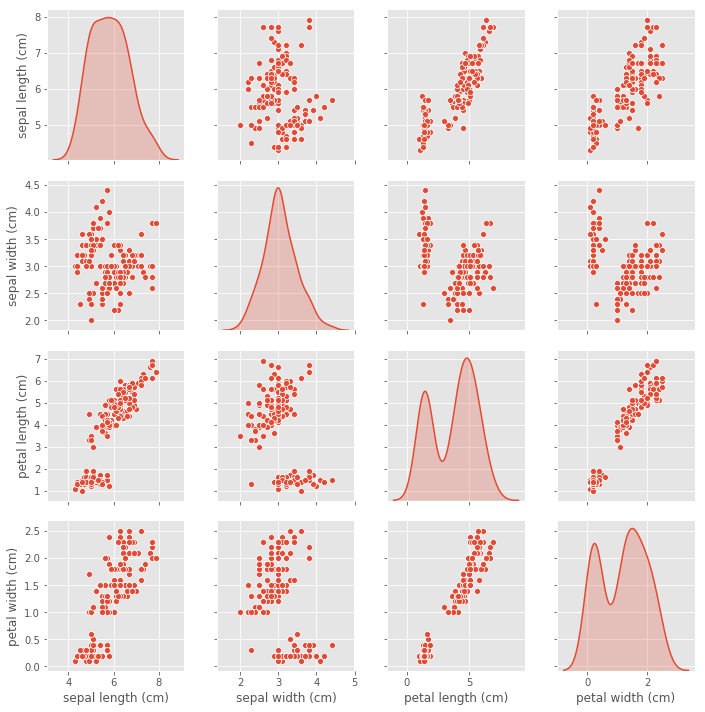

In [73]:
sns.pairplot(df, diag_kind='kde')

#### Standardization
Standardization makes no difference to the shape of a distribution.

In [75]:
# standardization
df2 = df.copy()
for col in df2:
    df2[col] = (df2[col] - df2[col].mean()) / df2[col].std()

In [76]:
df3 = pd.DataFrame()
for col in df2:
    df3[col] = [
        round(df.loc[:, col].mean(), 2),
        round(df2.loc[:, col].mean(), 2),
        round(df.loc[:, col].std(), 2),
        round(df2.loc[:, col].std(), 2),
    ]
df3.index = [['mean', 'mean', 'std', 'std'], ['original', 'standardized', 'original', 'standardized']]
df3

sepal length (cm)  sepal width (cm)  petal length (cm)  \
mean original                   5.84              3.06               3.76   
     standardized              -0.00             -0.00              -0.00   
std  original                   0.83              0.44               1.77   
     standardized               1.00              1.00               1.00   

                   petal width (cm)  
mean original                  1.20  
     standardized             -0.00  
std  original                  0.76  
     standardized              1.00

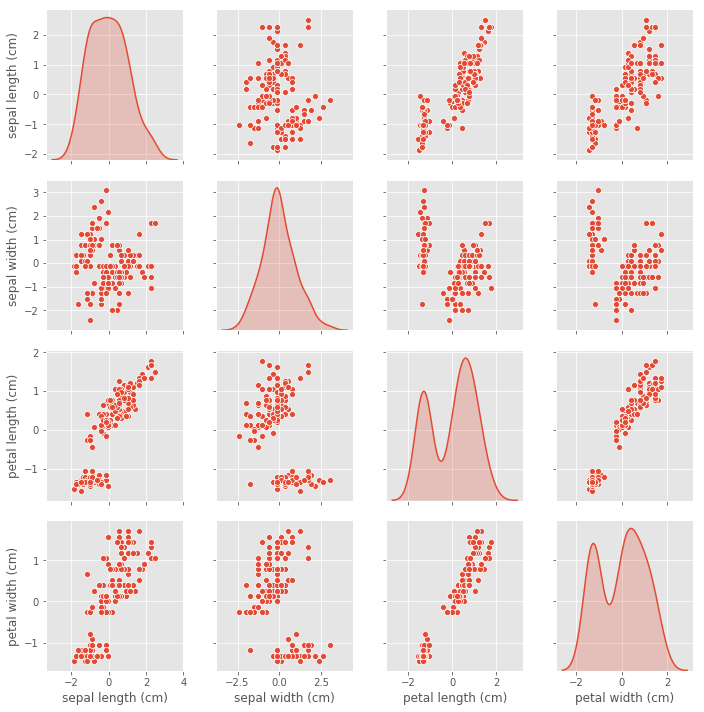

In [77]:
sns.pairplot(df2, diag_kind='kde')